In [ ]:
### Import the file from excel and save to a dataframe

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Week2_challenge_data_source.xlsx to Week2_challenge_data_source.xlsx


In [ ]:
import io
import pandas as pd 
df = pd.read_excel(io.BytesIO(uploaded['Week2_challenge_data_source.xlsx']))
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0

### Fill all missing values in the dataset with the mean

In [ ]:
df = df.fillna(df.mean())
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0000,2019-04-25 14:35:31,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.000000,5.000000,23.000000,44.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,3.762400e+04,3.878700e+04,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,213.000000,214.000000,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0000,2019-04-25 08:15:48,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.000000,26.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,1.680000e+02,3.560000e+03,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,971.000000,1022.000000,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0000,2019-04-25 11:58:13,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,109.795706,17.662883,6.000000,9.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,0.000000e+00,0.000000e+00,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,751.000000,695.000000,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0000,2019-04-25 07:36:35,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,109.795706,17.662883,44.000000,44.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,1.144710e+08,3.242301e+06,3.330000e+03,3.788200e+04,1.321510e+09,undefined,undefined,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,17.000000,207.000000,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0000,2019-04-25 10:40:32,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,109.795706,17.

In [ ]:
df.dtypes

Bearer Id                         object
Start                     datetime64[ns]
Start ms                         float64
End                       datetime64[ns]
End ms                           float64
                               ...      
TotalNetflixDataVolume           float64
TotalGamingDataVolume            float64
TotalOtherDataVolume             float64
TotalDLandUL                     float64
DecileRank                       float64
Length: 64, dtype: object

## Task 1 - User Overview analysis 

Start by identifying the top 10 handsets used by the customers.

In [ ]:
df.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(10)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: MSISDN/Number, dtype: int64

Then, identify the top 3 handset manufacturers

In [ ]:
df.groupby(['Handset Manufacturer'])['MSISDN/Number'].count().sort_values(ascending=False).head(3)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: MSISDN/Number, dtype: int64


Next, identify the top 5 handsets per handset manufacturer

In [ ]:
df.groupby(['Handset Manufacturer','Handset Type'])['MSISDN/Number'].count().sort_values(ascending=False).head(5)

Handset Manufacturer  Handset Type           
Huawei                Huawei B528S-23A           19752
Apple                 Apple iPhone 6S (A1688)     9419
                      Apple iPhone 6 (A1586)      9023
undefined             undefined                   8987
Apple                 Apple iPhone 7 (A1778)      6326
Name: MSISDN/Number, dtype: int64

#### Make a short interpretation and recommendation to marketing teams

I recommend to the marketing team if they would agree to purchase TellCo, they should purchase products from manufacturers with the highest number of counts per MSISDN number(MS International PSTN/ISDN Number of mobile - customer number
). The top three products with the highest amount of counts were "Apple", "Samsung", and "Huawei"...

#### Task 1.1 - Aggregate the Number of xDR sessions,  Session duration,  the total download (DL) and upload (UL) data , the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming).

#### Aggregate the Number of xDR sessions

In [ ]:
number_of_xdr_sessions = df.groupby(['MSISDN/Number'], sort=False)['Bearer Id'].agg(['count'])
number_of_xdr_sessions.columns = ["Num of xDR sessions"]
number_of_xdr_sessions

,Num of xDR sessions
MSISDN/Number,
3.366496e+10,2
3.368185e+10,2
3.376063e+10,1
3.375034e+10,1
3.369980e+10,1
...,...
3.364566e+10,1
3.366865e+10,1
3.365069e+10,1


#### Aggregate the Session duration

In [ ]:
session_duration = df.groupby(['MSISDN/Number'], sort=False)['Dur. (ms)'].agg(['sum'])
session_duration.columns = ["Session_duration"]
session_duration

,Session_duration
MSISDN/Number,
3.366496e+10,2083209.0
3.368185e+10,1698167.0
3.376063e+10,1361762.0
3.375034e+10,1321509.0
3.369980e+10,1089009.0
...,...
3.364566e+10,113545.0
3.366865e+10,59587.0
3.365069e+10,81230.0


#### Aggregate the total download (DL) and upload (UL) data, I found the sum of the two columns "Total Download (DL) and Upload (UL) Data"

In [ ]:
df["TotalDLandUL"]=df["Total DL (Bytes)"]+df["Total UL (Bytes)"]
df.groupby("MSISDN/Number")['TotalDLandUL'].sum()

MSISDN/Number
3.360100e+10    8.786906e+08
3.360100e+10    1.568596e+08
3.360100e+10    5.959665e+08
3.360101e+10    4.223207e+08
3.360101e+10    1.457411e+09
                    ...     
3.379000e+10    4.803073e+08
4.188282e+10    5.317447e+11
3.197021e+12    2.321240e+08
3.370000e+14    5.962878e+08
8.823971e+14    1.391536e+08
Name: TotalDLandUL, Length: 106857, dtype: float64

#### Aggregate the total data volume (in Bytes) during this session for each application (Social Media, Google, Email, YouTube, Netflix, Gaming, Other).

I found the sum of the two columns "Social Media DL (Bytes)" and "Social Media UL (Bytes)"

I found the sum of the two columns "Google DL (Bytes)" and "Google UL (Bytes)"

I found the sum of the two columns "Email DL (Bytes)" and "Email UL (Bytes)"

I found the sum of the two columns "Youtube DL (Bytes)" and "Youtube UL (Bytes)"

I found the sum of the two columns "Netflix DL (Bytes)" and "Netflix UL (Bytes)"

I found the sum of the two columns "Gaming DL (Bytes)" and "Gaming UL (Bytes)"

I found the sum of the two columns "Other DL (Bytes)" and "Other UL (Bytes)"

In [ ]:
df["TotalSocialMediaDataVolume"] = df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["TotalGoogleDataVolume"] = df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["TotalEmailDataVolume"] = df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["TotalYoutubeDataVolume"] = df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["TotalNetflixDataVolume"] = df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["TotalGamingDataVolume"] = df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["TotalOtherDataVolume"] = df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

concatenate = pd.concat([df['TotalSocialMediaDataVolume'], df['TotalGoogleDataVolume'], df['TotalEmailDataVolume'],
                        df['TotalYoutubeDataVolume'], df['TotalNetflixDataVolume'], df['TotalGamingDataVolume'], df["TotalOtherDataVolume"]], axis=1)
concatenate

,TotalSocialMediaDataVolume,TotalGoogleDataVolume,TotalEmailDataVolume,TotalYoutubeDataVolume,TotalNetflixDataVolume,TotalGamingDataVolume,TotalOtherDataVolume
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...
149996,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


## Task 1.2 - Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column.

### Conduct a Non-Graphical Univariate Analysis by computing position & dispersion parameters for each quantitative variables of each of the applications) and provide useful interpretation.


Non-Graphical Univariate Analysis for the Session duration showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['Dur. (ms)'].sum().max() - df.groupby('MSISDN/Number')['Dur. (ms)'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['Dur. (ms)'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 7142.0

Maximum 18553754.0

Mean 146167.1563225275

Mode 0    86399.0
dtype: float64

Median 102740.0

Standard Deviation 186358.66967530473

Variance 34729553763.149345

Skewness 20.539550876917446

Kurtosis 1237.8325752550745

Range 18546612.0

Quartile Range
 0.25     71309.0
0.50    102741.0
0.75    172799.0
Name: Dur. (ms), dtype: float64


Non-Graphical Univariate Analysis for  the total download (DL) and upload (UL) data showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalDLandUL'].sum().max() - df.groupby('MSISDN/Number')['TotalDLandUL'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalDLandUL'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 33249009.0

Maximum 8846226494.0

Mean 690962103.3077506

Mode 0    321294586.0
1    375293583.0
2    477037375.0
3    637726002.0
4    811996647.0
dtype: float64

Median 617923138.0

Standard Deviation 491055891.07422215

Variance 2.411358881586983e+17

Skewness 2.2695746999307143

Kurtosis 11.615909574361327

Range 8812977485.0

Quartile Range
 0.25    358552970.0
0.50    617923242.0
0.75    857434938.0
Name: TotalDLandUL, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Social Media showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalSocialMediaDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 1563.0

Maximum 43374779.0

Mean 2547966.816014075

Mode 0    1231643.0
1    1402627.0
2    1423535.0
3    2424396.0
4    2453919.0
5    2562133.0
6    2907868.0
7    3319170.0
8    3618642.0
dtype: float64

Median 2303756.0

Standard Deviation 1908038.0421556635

Variance 3640609170313.2173

Skewness 2.0904588413667082

Kurtosis 11.519748473838053

Range 43373216.0

Quartile Range
 0.25    1211309.0
0.50    2303811.0
0.75    3307504.0
Name: TotalSocialMediaDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the totaldata volume (in Bytes) of Google showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalGoogleDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 40330.0

Maximum 152191852.0

Mean 10882434.418469716

Mode 0        330562.0
1       1050099.0
2       1218260.0
3       1810553.0
4       2116621.0
          ...    
314    18494891.0
315    20496267.0
316    24063125.0
317    24128053.0
318    29030323.0
Length: 319, dtype: float64

Median 9586153.0

Standard Deviation 7544861.436829419

Variance 56924934100955.69

Skewness 2.4012212064678575

Kurtosis 12.622354344531711

Range 152151522.0

Quartile Range
 0.25     5942683.0
0.50     9586186.0
0.75    13214668.0
Name: TotalGoogleDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Email showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalEmailDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 18176.0

Maximum 42418782.0

Mean 3148795.810838886

Mode 0     648993.0
1     836833.0
2    1801836.0
3    2204920.0
4    2300925.0
5    3332714.0
6    3510377.0
7    3559336.0
dtype: float64

Median 2799824.5

Standard Deviation 2222400.099580454

Variance 4939062202615.212

Skewness 2.3745210362714477

Kurtosis 12.599693462968796

Range 42400606.0

Quartile Range
 0.25    1674484.0
0.50    2799854.0
0.75    3847195.0
Name: TotalEmailDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Youtube showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalYoutubeDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 78903.0

Maximum 452958769.0

Mean 31558399.279095232

Mode 0    34003356.0
dtype: float64

Median 26800376.0

Standard Deviation 21294917.681802288

Variance 453473519074735.75

Skewness 2.539667384384391

Kurtosis 13.96731245618334

Range 452879866.0

Quartile Range
 0.25    18631449.0
0.50    26800403.0
0.75    37927872.0
Name: TotalYoutubeDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Netflix showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalNetflixDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 184569.0

Maximum 399519079.0

Mean 31538332.309257317

Mode 0       3192097.0
1       3276471.0
2       3592917.0
3       8093178.0
4       8355475.0
          ...    
119    47985355.0
120    50433433.0
121    52021303.0
122    61400596.0
123    64969935.0
Length: 124, dtype: float64

Median 26718889.5

Standard Deviation 21289556.969838105

Variance 453245235971982.25

Skewness 2.47857080824592

Kurtosis 12.692311746695008

Range 399334510.0

Quartile Range
 0.25    18556067.0
0.50    26719548.0
0.75    37976871.0
Name: TotalNetflixDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Gaming showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().mean())
print("")
print("Mode", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalGamingDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 306358.0

Maximum 7749432234.0

Mean 599769010.7173393

Mode 0    268338338.0
1    339013838.0
2    515040171.0
3    789563635.0
dtype: float64

Median 542349206.5

Standard Deviation 449150462.4004246

Variance 2.0173613787451523e+17

Skewness 2.0681880884156922

Kurtosis 10.068305295508717

Range 7749125876.0

Quartile Range
 0.25    288066639.0
0.50    542350112.0
0.75    777301670.0
Name: TotalGamingDataVolume, dtype: float64


Non-Graphical Univariate Analysis for  the total data volume (in Bytes) of Others showing the: Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range.

In [ ]:
print("Minimum", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().min())
print("")
print("Maximum", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().max())
print("")
print("Mean", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().mean())
print("")
print("Mode\n", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().mode())
print("")
print("Median", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().median())
print("")
print("Standard Deviation", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().std())
print("")
print("Variance", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().div(1000000).var())
print("")
print("Skewness", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().skew())
print("")
print("Kurtosis", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().kurtosis())
print("")
print("Range", (df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().max() - df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().min()))
print("")
print("Quartile Range\n", df.groupby('MSISDN/Number')['TotalOtherDataVolume'].sum().quantile([0.25, 0.50, 0.75], interpolation='nearest'))

Minimum 149045.0

Maximum 8167877776.0

Mean 598508764.2792356

Mode
 0    162783729.0
1    269036790.0
2    322296644.0
3    586399206.0
4    833721372.0
dtype: float64

Median 539832343.0

Standard Deviation 448922110.04362017

Variance 201531.06088601827

Skewness 2.0072673233215697

Kurtosis 9.01710828077709

Range 8167728731.0

Quartile Range
 0.25    285564882.0
0.50    539840096.0
0.75    775390399.0
Name: TotalOtherDataVolume, dtype: float64


#### Creating a Dataframe to store all my Non-Graphical Univariate Analysis I got from the above calculation by computing position & dispersion parameters for each quantitative variable

In [ ]:
import pandas as pd

data = {
        'Application': ['Session duration','Total download (DL) and upload (UL) data','Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Others'],
        'Minimum Value': [7142.0,33249009.0,1563.0,40330.0,18176.0,78903.0,184569.0, 306358.0, 149045.0],
        'Maximum Value': [18553754.0,8846226494.0,43374779.0,152191852.0,42418782.0,452958769.0,399519079.0, 7749432234.0, 8167877776.0],
        'Mean': [146167.1563225275,690962103.3077506,2547966.816014075,10882434.418469716,3148795.810838886,31558399.279095232,31538332.309257317,599769010.7173393, 598508764.2792356],
        'Mode': [86399.0,[321294586.0,375293583.0,477037375.0,637726002.0],[1231643.0,1402627.0,1423535.0,2424396.0],[330562.0,1050099.0,1218260.0,1810553.0],[648993.0,836833.0,1801836.0,2204920.0],34003356.0,[3192097.0,3276471.0,3592917.0,8093178.0],[268338338.0, 339013838.0,515040171.0,789563635.0],[162783729.0,269036790.0,322296644.0,586399206.0,833721372.0]],
        'Median': [102740.0,617923138.0,2303756.0,9586153.0,2799824.5,26800376.0,26718889.5,542349206.5,539832343.0],
        'Standard Deviation': [186358.66967530473,491055891.07422215,1908038.0421556635,7544861.436829419,2222400.099580454,21294917.681802288,21289556.969838105,449150462.4004246,448922110.04362017],
        'Variance': [34729553763.149345,2.411358881586983e+17,3640609170313.2173,56924934100955.69,4939062202615.212,453473519074735.75,453245235971982.25,2.0173613787451523e+17,201531.06088601827],
        'Skewness': [20.539550876917446,2.2695746999307143,2.0904588413667082,2.4012212064678575,2.3745210362714477,2.539667384384391,2.47857080824592,2.0681880884156922,2.0072673233215697],
        'Kurtosis': [1237.8325752550745,11.615909574361327,11.519748473838053,12.622354344531711,12.599693462968796,13.96731245618334,12.692311746695008,10.068305295508717,9.01710828077709],
        'Range': [18546612.0,8812977485.0,43373216.0,152151522.0,42400606.0,452879866.0,399334510.0,7749125876.0,8167728731.0],
        '1st Quartile': [71309.0,358552970.0,1211309.0,5942683.0,1674484.0,18631449.0,18556067.0,288066639.0,285564882.0],
        '2nd Quartile': [102741.0,617923242.0,2303811.0,9586186.0,2799854.0,26800403.0,26719548.0,542350112.0,539840096.0],
        '3rd Quartile': [172799.0,857434938.0,3307504.0,13214668.0,3847195.0,37927872.0,37976871.0,777301670.0,775390399.0]
        }

df_new = pd.DataFrame (data, columns = ['Application', 'Minimum Value', 'Maximum Value', 'Mean', 'Mode', 'Median', 'Standard Deviation', 'Variance', 'Skewness', 'Kurtosis', 'Range', '1st Quartile', '2nd Quartile', '3rd Quartile'])
df_new

,Application,Minimum Value,Maximum Value,Mean,Mode,Median,Standard Deviation,Variance,Skewness,Kurtosis,Range,1st Quartile,2nd Quartile,3rd Quartile
0,Session duration,7142.0,1.855375e+07,1.461672e+05,86399,102740.0,1.863587e+05,3.472955e+10,20.539551,1237.832575,1.854661e+07,71309.0,102741.0,172799.0
1,Total download (DL) and upload (UL) data,33249009.0,8.846226e+09,6.909621e+08,"[321294586.0, 375293583.0, 477037375.0, 637726...",617923138.0,4.910559e+08,2.411359e+17,2.269575,11.615910,8.812977e+09,358552970.0,617923242.0,857434938.0
2,Social Media,1563.0,4.337478e+07,2.547967e+06,"[1231643.0, 1402627.0, 1423535.0, 2424396.0]",2303756.0,1.908038e+06,3.640609e+12,2.090459,11.519748,4.337322e+07,1211309.0,2303811.0,3307504.0
3,Google,40330.0,1.521919e+08,1.088243e+07,"[330562.0, 1050099.0, 1218260.0, 1810553.0]",9586153.0,7.544861e+06,5.692493e+13,2.401221,12.622354,1.521515e+08,5942683.0,9586186.0,13214668.0
4,Email,18176.0,4.241878e+07,3.148796e+06,"[648993.0, 836833.0, 1801836.0, 2204920.0]",2799824.5,2.222400e+06,4.939062e+12,2.374521,12.599693,4.240061e+07,1674484.0,2799854.0,3847195.0
5,Youtube,78903.0,4.529588e+08,3.155840e+07,3.40034e+07,26800376.0,2.129492e+07,4.534735e+14,2.539667,13.967312,4.528799e+08,18631449.0,26800403.0,37927872.0
6,Netflix,184569.0,3.995191e+08,3.153833e+07,"[3192097.0, 3276471.0, 3592917.0, 8093178.0]",26718889.5,2.128956e+07,4.532452e+14,2.478571,12.692312,3.993345e+08,18556067.0,26719548.0,37976871.0
7,Gaming,306358.0,7.749432e+09,5.997690e+08,"[268338338.0, 339013838.0, 515040171.0, 789563...",542349206.5,4.491505e+08,2.017361e+17,2.068188,10.068305,7.749126e+09,288066639.0,542350112.0,777301670.0
8,Others,149045.0,8.167878e+09,5.985088e+08,"[162783729.0, 269036790.0, 322296644.0, 586399...",539832343.0,4.489221e+08,2.015311e+05,2.007267,9.017108,8.167729e+09,285564882.0,539840096.0,775390399.0


####Convert from Bytes to MegatBytes for easy interpretation, we divide each column by 1000

### Univariate Plot for the Minimum Value, Maximum Value, Mean, Mode, Median, Standard Deviation, Variance, Skewness, Kurtosis, Range and Quartile Range for the Session Duration using a Bar Plot¶

In [ ]:
ses_freq = df.groupby(['MSISDN/Number'], sort=False)['Dur. (ms)'].agg(['sum'])
ses_freq.columns = ["Num of users"]
ses_freq

,Num of users
MSISDN/Number,
3.366496e+10,2083209.0
3.368185e+10,1698167.0
3.376063e+10,1361762.0
3.375034e+10,1321509.0
3.369980e+10,1089009.0
...,...
3.364566e+10,113545.0
3.366865e+10,59587.0
3.365069e+10,81230.0


In [ ]:
session_duration.hist(column='Session_duration')

NameError: ignored

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the average of the total download (DL) and upload (UL) data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5a701240>]],
      dtype=object)

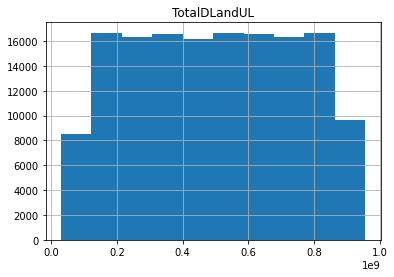

In [ ]:
df.hist(column='TotalDLandUL')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Social Media

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a58552f98>]],
      dtype=object)

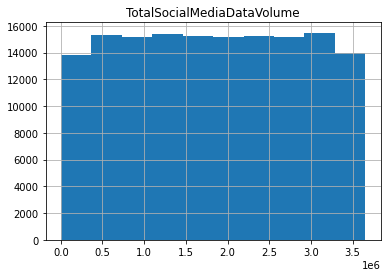

In [ ]:
df.hist(column='TotalSocialMediaDataVolume')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Google

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a58398dd8>]],
      dtype=object)

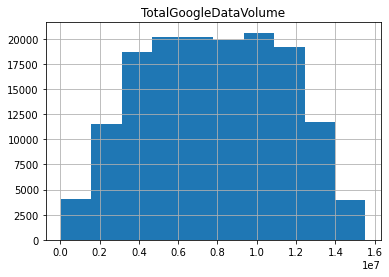

In [ ]:
df.hist(column='TotalGoogleDataVolume')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Email

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a589244a8>]],
      dtype=object)

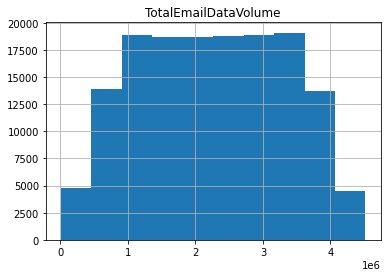

In [ ]:
df.hist(column='TotalEmailDataVolume')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Youtube

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8b79fa20>]],
      dtype=object)

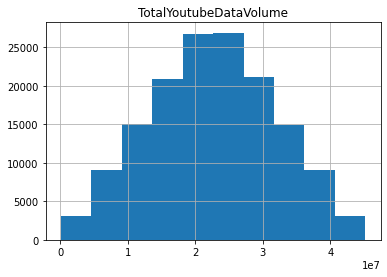

In [ ]:
df.hist(column='TotalYoutubeDataVolume')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Netflix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e8b6fd748>]],
      dtype=object)

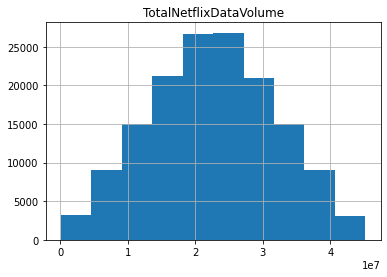

In [ ]:
df.hist(column='TotalNetflixDataVolume')

### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Gaming

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a5882ee10>]],
      dtype=object)

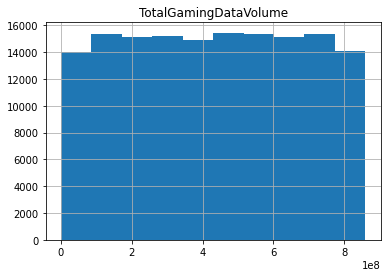

In [ ]:
df.hist(column='TotalGamingDataVolume')

#### Univariate Plot for the Minimum value, the Maximum value, the Average, the 1st, 2nd & 3rd Quartile for the total data volume (in Bytes) of Others


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a58c70da0>]],
      dtype=object)

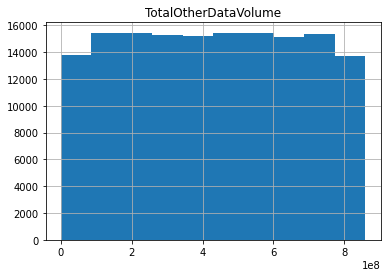

In [ ]:
df.hist(column='TotalOtherDataVolume')

### Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your findings.

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd

data = {
        'Application': ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Others'],
        'TotalBytesofEachApplication': [df["TotalSocialMediaDataVolume"].max(),df["TotalGoogleDataVolume"].max(),df["TotalEmailDataVolume"].max(),df["TotalYoutubeDataVolume"].max(),df["TotalNetflixDataVolume"].max(), df["TotalGamingDataVolume"].max(), df["TotalOtherDataVolume"].max()],
        'TotalDLandUL': [df["TotalDLandUL"].max(), df["TotalDLandUL"].max(), df["TotalDLandUL"].max(), df["TotalDLandUL"].max(), df["TotalDLandUL"].max(), df["TotalDLandUL"].max(), df["TotalDLandUL"].max()]
        }

df_bivariate = pd.DataFrame (data, columns = ['Application', 'TotalBytesofEachApplication', 'TotalDLandUL'])
df_bivariate

,Application,TotalBytesofEachApplication,TotalDLandUL
0,Social Media,3650861.0,955984776.0
1,Google,15528782.0,955984776.0
2,Email,4518036.0,955984776.0
3,Youtube,45190078.0,955984776.0
4,Netflix,45198153.0,955984776.0
5,Gaming,859202784.0,955984776.0
6,Others,859520934.0,955984776.0


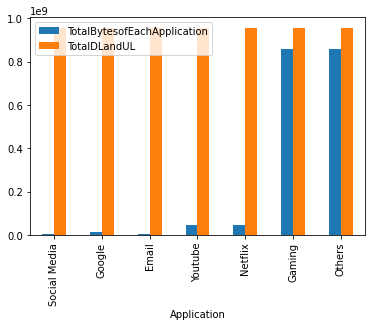

In [ ]:
df_bivariate.plot(x="Application", y=['TotalBytesofEachApplication', 'TotalDLandUL'], kind="bar")

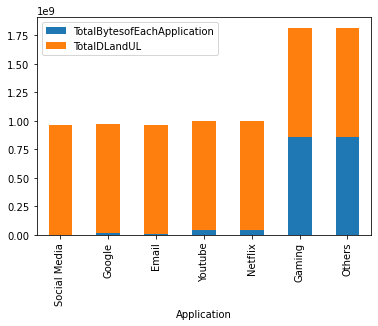

In [ ]:
df_bivariate.plot(x="Application", y=['TotalBytesofEachApplication', 'TotalDLandUL'], kind="bar", stacked=True)

#### Variable transformations – segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

1. Create a new dataframe with MSISDN and one engagement metric

In [ ]:
import pandas as pd

new_dataset = df.loc[:, ['TotalSocialMediaDataVolume','TotalGoogleDataVolume', 'TotalEmailDataVolume', 'TotalYoutubeDataVolume', 'TotalNetflixDataVolume', 'TotalGamingDataVolume', 'TotalOtherDataVolume', 'TotalDLandUL']]
new_dataset

,TotalSocialMediaDataVolume,TotalGoogleDataVolume,TotalEmailDataVolume,TotalYoutubeDataVolume,TotalNetflixDataVolume,TotalGamingDataVolume,TotalOtherDataVolume,TotalDLandUL
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,3.456294e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,7.071854e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,3.076910e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,8.893527e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,6.076814e+08
...,...,...,...,...,...,...,...,...
149996,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,6.318041e+08
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,7.057839e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,6.276986e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,4.015220e+08


In [ ]:
mssisnd_gaming_dataframe = df.groupby(['MSISDN/Number'], sort=False)['TotalGamingDataVolume', 'TotalDLandUL'].agg(['sum'])
mssisnd_gaming_dataframe


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [ ]:
index_list = []
another_index_list = []

for index,row in sorted_gaming.iterrows():
  index_list.append(index)
  for i in index_list:
    if i in range(0,10):
      another_index_list.append(1)
    elif i in range(10,20):
      another_index_list.append(2)
    elif i in range(20,30):
      another_index_list.append(3)
    elif i in range(30,40):
      another_index_list.append(4)
    elif i in range(40,50):
      another_index_list.append(5)
    else:
      another_index_list.append(6)

In [ ]:
gaming_dataframe = pd.concat([df['TotalGamingDataVolume'], df["TotalDLandUL"]], axis=1)
gaming_dataframe['Decile Ranking'] = gaming_dataframe = pd.concat([df['TotalGamingDataVolume'], df["TotalDLandUL"]], axis=1)
gaming_dataframe['Decile Ranking'] = 

#### Correlation Analysis – compute a correlation matrix for the following variables and interpret your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, Gaming data, Other data

Original Data

In [ ]:
new_dataset = df.loc[:, ['TotalSocialMediaDataVolume','TotalGoogleDataVolume', 'TotalEmailDataVolume', 'TotalYoutubeDataVolume', 'TotalNetflixDataVolume', 'TotalGamingDataVolume', 'TotalOtherDataVolume']]
new_dataset

,TotalSocialMediaDataVolume,TotalGoogleDataVolume,TotalEmailDataVolume,TotalYoutubeDataVolume,TotalNetflixDataVolume,TotalGamingDataVolume,TotalOtherDataVolume
0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...
149996,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


After using pearson correlation

In [ ]:
new_dataset.corr(method ='pearson')

,TotalSocialMediaDataVolume,TotalGoogleDataVolume,TotalEmailDataVolume,TotalYoutubeDataVolume,TotalNetflixDataVolume,TotalGamingDataVolume,TotalOtherDataVolume
TotalSocialMediaDataVolume,1.000000,-0.001708,0.004032,0.000548,0.001013,0.001082,0.006065
TotalGoogleDataVolume,-0.001708,1.000000,-0.000412,0.002277,-0.001902,-0.000994,-0.001727
TotalEmailDataVolume,0.004032,-0.000412,1.000000,-0.002919,0.001029,-0.000644,-0.001299
TotalYoutubeDataVolume,0.000548,0.002277,-0.002919,1.000000,0.002882,-0.002999,0.002969
TotalNetflixDataVolume,0.001013,-0.001902,0.001029,0.002882,1.000000,-0.003109,-0.009033
TotalGamingDataVolume,0.001082,-0.000994,-0.000644,-0.002999,-0.003109,1.000000,-0.002661
TotalOtherDataVolume,0.006065,-0.001727,-0.001299,0.002969,-0.009033,-0.002661,1.000000


#### Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points-maximum). - (jupyter notebook + slide )


All the variables should be on the same scale before applying PCA, otherwise, a feature with large values will dominate the result.  Below I use StandardScaler in scikit-learn to standardize the dataset’s features onto the unit scale (mean = 0 and variance = 1).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

from sklearn.preprocessing import StandardScaler

features = ['TotalSocialMediaDataVolume','TotalGoogleDataVolume', 'TotalEmailDataVolume', 'TotalYoutubeDataVolume', 'TotalNetflixDataVolume', 'TotalGamingDataVolume', 'TotalOtherDataVolume']

# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,-0.249184,-1.393860e+00,1.346461,-0.463680,-5.154441e-01,-0.565147,-1.022770e+00
1,0.101413,-9.649614e-01,-1.233975,1.807728,1.396959e+00,0.735957,4.628409e-01
2,-0.098464,6.887210e-01,1.030731,1.274148,1.212203e-01,-0.821054,-5.942843e-02
3,-1.130464,1.138794e+00,-0.175631,1.502285,-8.137555e-01,1.557480,1.366694e+00
4,-0.883956,-1.662251e-02,-0.138878,1.252196,-5.495004e-01,0.413508,5.559913e-01
...,...,...,...,...,...,...,...
149996,1.630693,1.415541e+00,-1.464119,0.574429,1.612525e+00,0.432236,-1.696132e+00
149997,0.505899,-9.646017e-01,-0.128264,-0.051690,1.945265e+00,0.824915,1.172672e+00
149998,-0.548463,-3.474641e-01,-0.187493,0.202550,-8.205461e-01,0.559795,-1.220673e+00
149999,-0.970548,-1.422689e-02,0.552524,-0.597071,-6.623371e-01,-0.308446,1.589835e+00


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca

,0,1,2,3,4,5,6
0,-5.074593e-01,-1.227157e+00,5.317994e-01,-5.936810e-02,-1.279046e+00,-9.595632e-01,1.028368e+00
1,-2.237921e-01,1.207905e+00,6.706560e-01,-2.033470e+00,1.334596e+00,-4.475735e-01,-6.033159e-01
2,-1.505479e-01,9.912913e-01,9.009066e-01,1.097659e+00,-2.019019e-03,-8.989525e-01,1.797665e-01
3,1.065456e+00,1.090465e+00,-1.473854e+00,4.078578e-01,1.333387e+00,-1.478023e+00,-1.092210e+00
4,4.643879e-01,9.043207e-01,-6.117943e-01,-2.472777e-01,2.979408e-01,-1.246819e+00,-1.969438e-01
...,...,...,...,...,...,...,...
149996,-1.572851e+00,7.641016e-01,5.741748e-01,4.828384e-02,2.327711e+00,1.889176e+00,6.507794e-01
149997,1.352603e-02,-4.318346e-01,1.199428e+00,-1.399000e+00,6.445793e-01,2.518680e-01,-1.727368e+00
149998,-5.837626e-01,-3.040117e-01,-9.645328e-01,-2.703817e-01,1.847461e-01,-6.516907e-01,1.038734e+00
149999,1.125085e+00,-6.720132e-02,-5.273745e-01,3.876185e-01,-1.245677e+00,-5.006770e-01,-1.079006e+00


The shape of my pca

In [ ]:
x_pca.shape

(150001, 7)

What are the variances explained by each of the principal components? Use pca.explained_variance_ratio_ to return a vector of the variance:

Explained variance is the amount of variance explained by each of the selected components. This attribute is associated with the sklearn PCA model as explained_variance_

In [ ]:
pca.explained_variance_ 

array([1.0105263 , 1.00626495, 1.00522925, 1.00018846, 0.99837738,
       0.99319859, 0.98626173])



Explained variance ratio is the percentage of variance explained by each of the selected components. It’s attribute is explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_

array([0.14435994, 0.14375118, 0.14360322, 0.14288311, 0.14262439,
       0.14188457, 0.14089359])

It shows the first principal component accounts for 14.435% variance, the second, third and fourth account for 14.437%, 14.360%, 14.288%, 14.264%, 14.188% and 14.089% variance respectively. We can say 14.435 + 14.437 = 28.872% of the information is captured by the first and second principal components. 

So that means, performing the dimensionality reduction to reduce my features from 55 to 7 led to 100-(28.872%) loss in features which is bad

We often want to keep only the significant features and drop the insignificant ones. A rule of thumb is to keep the top principal components that capture significant variance and ignore the small ones.

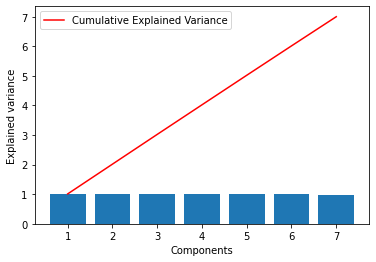

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

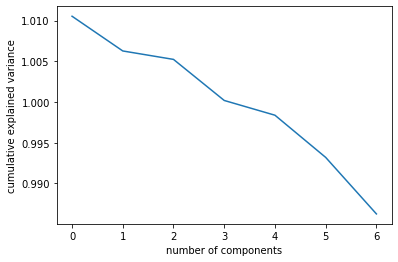

In [ ]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## TASK 2

In the current dataset you’re expected to track the user’s engagement using the following engagement metrics:

sessions frequency

the duration of the session

the sessions total traffic (download and upload (bytes))



Aggregate the sessions frequency

In [100]:
session_frequency = df.groupby(['Bearer Id'], sort=False)['MSISDN/Number'].agg(['count'])
session_frequency.columns = ["Num of users"]
session_frequency

,Num of users
Bearer Id,
13114483460844900352,1
13114483482878900224,1
13114483484080500736,1
13114483485442799616,1
13114483499480700928,1
...,...
13114483573367199744,2
13042425979329300480,1
7277825670196679680,1


Aggregate the duration of the session

In [ ]:
session_duration = df.groupby(['MSISDN/Number'], sort=False)['Dur. (ms)'].agg(['sum'])
session_duration.columns = ["Session Duration"]
session_duration

,Session Duration
MSISDN/Number,
3.366496e+10,2083209.0
3.368185e+10,1698167.0
3.376063e+10,1361762.0
3.375034e+10,1321509.0
3.369980e+10,1089009.0
...,...
3.364566e+10,113545.0
3.366865e+10,59587.0
3.365069e+10,81230.0


Aggregate the sessions total traffic (download and upload (bytes))


In [97]:
df["TotalDLandUL"]=df["Total DL (Bytes)"]+df["Total UL (Bytes)"]
session_total_traffic = df.groupby("MSISDN/Number")['TotalDLandUL'].agg(['sum'])
session_total_traffic.columns = ["TotalDLandUL"]
session_total_traffic

,TotalDLandUL
MSISDN/Number,
3.360100e+10,8.786906e+08
3.360100e+10,1.568596e+08
3.360100e+10,5.959665e+08
3.360101e+10,4.223207e+08
3.360101e+10,1.457411e+09
...,...
3.379000e+10,4.803073e+08
4.188282e+10,5.317447e+11
3.197021e+12,2.321240e+08


## Task 2 - User Engagement analysis


Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric

sessions frequency 


In [ ]:
top_10_customers_per_session_frequency = df.groupby(['MSISDN/Number'], sort=False)['Bearer Id'].agg(['count'])
top_10_customers_per_session_frequency.columns = ["Top_10_Customer_Per_Session_Frequency"]
top_10_customers_per_session_frequency.sort_values(by='Top_10_Customer_Per_Session_Frequency', ascending=False).head(10)

,Top_10_Customer_Per_Session_Frequency
MSISDN/Number,
4.188282e+10,1066
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.360452e+10,12


the duration of the session 


In [ ]:
top_10_customers_per_session_duration = df.groupby(['MSISDN/Number'], sort=False)['Dur. (ms)'].agg(['sum'])
top_10_customers_per_session_duration.columns = ["Top_10_Customer_Per_Session_Duration"]
top_10_customers_per_session_duration.sort_values(by='Top_10_Customer_Per_Session_Duration', ascending=False).head(10)

,Top_10_Customer_Per_Session_Duration
MSISDN/Number,
4.188282e+10,7.255100e+07
3.362578e+10,1.855375e+07
3.361489e+10,9.966898e+06
3.376054e+10,9.279434e+06
3.362632e+10,8.791927e+06
3.366716e+10,8.744914e+06
3.366284e+10,6.614270e+06
3.366469e+10,6.288730e+06
3.360313e+10,6.287761e+06


the sessions total traffic (download and upload (bytes))


In [ ]:
top_10_customers_per_session_total_traffic = df.groupby(['MSISDN/Number'], sort=False)['TotalDLandUL'].agg(['sum'])
top_10_customers_per_session_total_traffic.columns = ["Top_10_Customer_Per_Session_Total_Traffic"]
top_10_customers_per_session_total_traffic.sort_values(by='Top_10_Customer_Per_Session_Total_Traffic', ascending=False).head(10)

,Top_10_Customer_Per_Session_Total_Traffic
MSISDN/Number,
4.188282e+10,5.317447e+11
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09


*Create* a new data frame that has only the engagement metrics (that is session frequency, duration and total data)

In [ ]:
final_df = pd.concat([top_10_customers_per_session_frequency['Top_10_Customer_Per_Session_Frequency'], top_10_customers_per_session_duration['Top_10_Customer_Per_Session_Duration'], top_10_customers_per_session_total_traffic['Top_10_Customer_Per_Session_Total_Traffic']], axis=1)
final_df

,Top_10_Customer_Per_Session_Frequency,Top_10_Customer_Per_Session_Duration,Top_10_Customer_Per_Session_Total_Traffic
MSISDN/Number,,,
3.366496e+10,2,2083209.0,626149824.0
3.368185e+10,2,1698167.0,930950812.0
3.376063e+10,1,1361762.0,307690973.0
3.375034e+10,1,1321509.0,889352748.0
3.369980e+10,1,1089009.0,607681403.0
...,...,...,...
3.364566e+10,1,113545.0,922173944.0
3.366865e+10,1,59587.0,872761860.0
3.365069e+10,1,81230.0,631804110.0


Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [ ]:
import pandas as pd
from sklearn import preprocessing

normalized_df=(final_df-final_df.mean())/final_df.std()
normalized_df

,Top_10_Customer_Per_Session_Frequency,Top_10_Customer_Per_Session_Duration,Top_10_Customer_Per_Session_Total_Traffic
MSISDN/Number,,,
3.366496e+10,0.177717,6.689468,-0.041117
3.368185e+10,0.177717,5.359281,0.138478
3.376063e+10,-0.120343,4.197119,-0.228759
3.375034e+10,-0.120343,4.058058,0.113968
3.369980e+10,-0.120343,3.254851,-0.051999
...,...,...,...
3.364566e+10,-0.120343,-0.115039,0.133306
3.366865e+10,-0.120343,-0.301445,0.104192
3.365069e+10,-0.120343,-0.226676,-0.037785


[[ 5.32980307e-01  1.20869984e+00  5.52319780e-01]
 [ 3.17313336e+02  2.50131313e+02  3.12904816e+02]
 [-5.36586718e-02 -1.16878778e-01 -5.54426041e-02]]


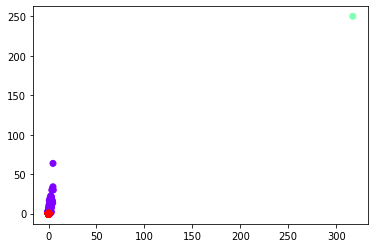

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

kmeans = KMeans(n_clusters=3).fit(normalized_df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(normalized_df.iloc[:,0],normalized_df.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.show()

Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text.

In [101]:
final_df['cluster'] = kmeans.labels_
final_df

,Top_10_Customer_Per_Session_Frequency,Top_10_Customer_Per_Session_Duration,Top_10_Customer_Per_Session_Total_Traffic,cluster
MSISDN/Number,,,,
3.366496e+10,2,2083209.0,626149824.0,0
3.368185e+10,2,1698167.0,930950812.0,0
3.376063e+10,1,1361762.0,307690973.0,0
3.375034e+10,1,1321509.0,889352748.0,0
3.369980e+10,1,1089009.0,607681403.0,0
...,...,...,...,...
3.364566e+10,1,113545.0,922173944.0,2
3.366865e+10,1,59587.0,872761860.0,2
3.365069e+10,1,81230.0,631804110.0,2


Minimum for Each Cluster

In [93]:
cluters_min = final_df.groupby(['cluster'], sort=False)['cluster'].agg(['min'])
cluters_min.columns = ["Cluster"]
cluters_min

,Cluster
cluster,
0,0
2,2
1,1


Maximum for Each Cluster

In [103]:
cluters_max = final_df.groupby(['cluster'], sort=False)['cluster'].agg(['max'])
cluters_max.columns = ["Cluster"]
cluters_max

,Cluster
cluster,
0,0
2,2
1,1


Average for Each Cluster

In [ ]:
cluters_mean = final_df.groupby(['cluster'], sort=False)['cluster'].agg(['mean'])
cluters_mean.columns = ["Cluster"]
cluters_mean

,Cluster
cluster,
0,0
2,2
1,1


Total for Each Cluster

In [104]:
cluters_sum = final_df.groupby(['cluster'], sort=False)['cluster'].agg(['sum'])
cluters_sum.columns = ["Cluster"]
cluters_sum

,Cluster
cluster,
0,0
2,195352
1,1


Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
data = {
        'Application': ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Others'],
        'TotalBytesofEachApplication': [df["TotalSocialMediaDataVolume"].max(),df["TotalGoogleDataVolume"].max(),df["TotalEmailDataVolume"].max(),df["TotalYoutubeDataVolume"].max(),df["TotalNetflixDataVolume"].max(), df["TotalGamingDataVolume"].max(), df["TotalOtherDataVolume"].max()],
        }

df_2 = pd.DataFrame (data, columns = ['Application', 'TotalBytesofEachApplication'])
df_2

,Application,TotalBytesofEachApplication
0,Social Media,3650861.0
1,Google,15528782.0
2,Email,4518036.0
3,Youtube,45190078.0
4,Netflix,45198153.0
5,Gaming,859202784.0
6,Others,859520934.0


top 10 social media users

In [ ]:
top_10_socialmedia_users = df.groupby(['TotalSocialMediaDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_socialmedia_users.columns = ["Top_10_Socialmedia_Users"]
top_10_socialmedia_users.sort_values(by='Top_10_Socialmedia_Users', ascending=False).head(10)

,Top_10_Socialmedia_Users
TotalSocialMediaDataVolume,
1546088.0,8.823971e+14
521566.0,3.370000e+14
715224.0,3.197021e+12
1422688.0,1.012235e+11
2479177.0,1.012088e+11
3190415.0,1.011934e+11
2327236.0,1.011857e+11
2800470.0,1.011846e+11
934728.0,1.011204e+11


top 10 google users

In [ ]:
top_10_google_users = df.groupby(['TotalGoogleDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_google_users.columns = ["Top_10_Google_Users"]
top_10_google_users.sort_values(by='Top_10_Google_Users', ascending=False).head(10)

,Top_10_Google_Users
TotalGoogleDataVolume,
9218647.0,8.823971e+14
9830617.0,3.370000e+14
10438660.0,3.197021e+12
10206791.0,1.011240e+11
8789923.0,1.010637e+11
5240092.0,1.009921e+11
2547743.0,7.567148e+10
9949290.0,7.557268e+10
11383027.0,7.555239e+10


top 10 email users

In [ ]:
top_10_email_users = df.groupby(['TotalEmailDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_email_users.columns = ["Top_10_Email_Users"]
top_10_email_users.sort_values(by='Top_10_Email_Users', ascending=False).head(10)

,Top_10_Email_Users
TotalEmailDataVolume,
3330974.0,8.823971e+14
3318582.0,3.370000e+14
1520771.0,3.197021e+12
1151999.0,1.011560e+11
3016932.0,1.011203e+11
3185944.0,1.011111e+11
2519489.0,1.011092e+11
969429.0,1.010962e+11
1335788.0,1.010919e+11


top 10 youtube users

In [ ]:
top_10_youtube_users = df.groupby(['TotalYoutubeDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_youtube_users.columns = ["Top_10_Youtube_Users"]
top_10_youtube_users.sort_values(by='Top_10_Youtube_Users', ascending=False).head(10)

,Top_10_Youtube_Users
TotalYoutubeDataVolume,
40940710.0,8.823971e+14
36734940.0,3.370000e+14
11959905.0,3.197021e+12
18836800.0,1.009696e+11
34003356.0,1.009607e+11
28588683.0,1.009299e+11
17996078.0,7.564722e+10
19950316.0,7.564368e+10
21452805.0,7.556577e+10


top 10 netflix users

In [ ]:
top_10_netflix_users = df.groupby(['TotalNetflixDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_netflix_users.columns = ["Top_10_Netflix_Users"]
top_10_netflix_users.sort_values(by='Top_10_Netflix_Users', ascending=False).head(10)

,Top_10_Netflix_Users
TotalNetflixDataVolume,
28846230.0,8.823971e+14
30905042.0,3.370000e+14
26592300.0,3.197021e+12
28963887.0,7.566482e+10
18301681.0,7.554562e+10
24930912.0,7.554161e+10
31682750.0,6.754486e+10
7574066.0,6.754482e+10
20257902.0,6.753893e+10


top 10 gaming users

In [ ]:
top_10_gaming_users = df.groupby(['TotalGamingDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_gaming_users.columns = ["Top_10_Gaming_Users"]
top_10_gaming_users.sort_values(by='Top_10_Gaming_Users', ascending=False).head(10)

,Top_10_Gaming_Users
TotalGamingDataVolume,
43070260.0,8.823971e+14
510142695.0,3.370000e+14
178048738.0,3.197021e+12
337168076.0,6.741989e+10
268338338.0,6.739937e+10
15151281.0,6.737803e+10
356189167.0,6.734595e+10
202421084.0,6.729611e+10
515040171.0,6.729521e+10


top 10 other application users

In [ ]:
top_10_otherapplication_users = df.groupby(['TotalOtherDataVolume'], sort=False)['MSISDN/Number'].agg(['sum'])
top_10_otherapplication_users.columns = ["Top_10_Other_Application_Users"]
top_10_otherapplication_users.sort_values(by='Top_10_Other_Application_Users', ascending=False).head(10)

,Top_10_Other_Application_Users
TotalOtherDataVolume,
401360457.0,8.823971e+14
149188439.0,3.370000e+14
470526473.0,3.197021e+12
190108349.0,7.553396e+10
446543030.0,6.744571e+10
449555184.0,6.742642e+10
777083727.0,6.742230e+10
690339331.0,6.742168e+10
54037059.0,6.738801e+10


Plot the top 3 most used applications.

In [ ]:
dff = df_2.sort_values(by='TotalBytesofEachApplication', ascending=False).head(3)
dff

,Application,TotalBytesofEachApplication
6,Others,859520934.0
5,Gaming,859202784.0
4,Netflix,45198153.0


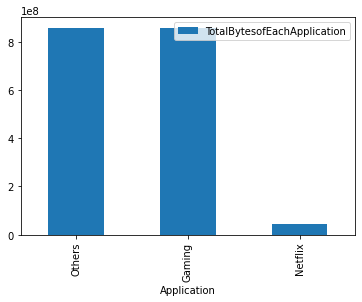

In [ ]:
dff.plot(x="Application", y='TotalBytesofEachApplication', kind="bar")

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

What is the optimized value of k?  - (slide)

Interpret your findings. - (slide)


To give equal importance to all features, I needed to scale the continuous features.

In [106]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mms = MinMaxScaler()
mms.fit(final_df)
data_transformed = mms.transform(final_df)
data_transformed

array([[9.38967136e-04, 2.86180929e-02, 1.11508000e-03, 0.00000000e+00],
       [9.38967136e-04, 2.33103800e-02, 1.68832510e-03, 0.00000000e+00],
       [0.00000000e+00, 1.86731165e-02, 5.16148296e-04, 0.00000000e+00],
       ...,
       [0.00000000e+00, 1.02128557e-03, 1.12571412e-03, 1.00000000e+00],
       [0.00000000e+00, 1.25588846e-03, 1.11799287e-03, 1.00000000e+00],
       [0.00000000e+00, 1.25121543e-03, 6.92618148e-04, 1.00000000e+00]])

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [91]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

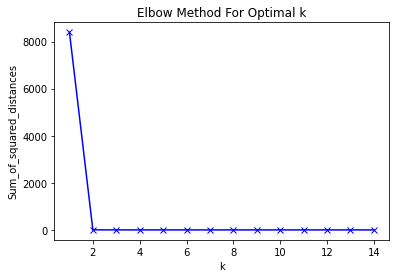

In [92]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow is at k=5 indicating the optimal k for this dataset is 2

## Task 3 - Experience Analytics